In [1]:
import pandas as pd
import numpy as np

In [2]:
data1Path = 'data\exp1Data.csv'
data2Path = 'data\exp2Data.csv'
data5Path = 'data\exp5Data.csv'
facesDataInsert = 'data\O&T300FacesTraitPCs.csv'

In [3]:
dataFaces = pd.read_csv(facesDataInsert)
data1 = pd.read_csv(data1Path)
data2 = pd.read_csv(data2Path)
data5 = pd.read_csv(data5Path)

In [5]:
data = pd.concat([data1, data2, data5])
data.head()

,Subject,Block,Trial,Stimulus,Group,RT,Acc,Location,Eye,Response
0,1,1,1,f42887_e_021,1,1.389223,1,10,2,4
1,1,1,2,f42887_e_203,1,1.084468,1,9,2,3
2,1,1,3,f42887_e_111,1,1.245008,1,9,2,3
3,1,1,4,f42887_e_176,1,1.075123,1,10,1,4
4,1,1,5,f42887_e_216,1,1.265365,1,9,1,3


In [7]:
combine1 = pd.merge(data, dataFaces, on='Stimulus')
combine1.head(), combine1.columns

(   Subject  Block  Trial      Stimulus  Group        RT  Acc  Location  Eye  \
 0        1      1      1  f42887_e_021      1  1.389223    1        10    2   
 1        1      2    319  f42887_e_021      1  1.372089    1         9    1   
 2       10      1    177  f42887_e_021      1  2.402000    1        10    1   
 3       10      2    516  f42887_e_021      1  1.162304    1         9    2   
 4       11      1     73  f42887_e_021      1  1.430640    1         9    2   
 
    Response  Valence    Power  
 0         4  -0.0065  0.04075  
 1         3  -0.0065  0.04075  
 2         4  -0.0065  0.04075  
 3         3  -0.0065  0.04075  
 4         3  -0.0065  0.04075  ,
 Index(['Subject', 'Block', 'Trial', 'Stimulus', 'Group', 'RT', 'Acc',
        'Location', 'Eye', 'Response', 'Valence', 'Power'],
       dtype='object'))

In [9]:
combine1.head()

,Subject,Block,Trial,Stimulus,Group,RT,Acc,Location,Eye,Response,Valence,Power
0,1,1,1,f42887_e_021,1,1.389223,1,10,2,4,-0.0065,0.04075
1,1,2,319,f42887_e_021,1,1.372089,1,9,1,3,-0.0065,0.04075
2,10,1,177,f42887_e_021,1,2.402000,1,10,1,4,-0.0065,0.04075
3,10,2,516,f42887_e_021,1,1.162304,1,9,2,3,-0.0065,0.04075
4,11,1,73,f42887_e_021,1,1.430640,1,9,2,3,-0.0065,0.04075


In [11]:
df = combine1.drop(columns=['Stimulus'])
df.head()

,Subject,Block,Trial,Group,RT,Acc,Location,Eye,Response,Valence,Power
0,1,1,1,1,1.389223,1,10,2,4,-0.0065,0.04075
1,1,2,319,1,1.372089,1,9,1,3,-0.0065,0.04075
2,10,1,177,1,2.402000,1,10,1,4,-0.0065,0.04075
3,10,2,516,1,1.162304,1,9,2,3,-0.0065,0.04075
4,11,1,73,1,1.430640,1,9,2,3,-0.0065,0.04075


In [13]:
from sklearn.utils import shuffle
shuffle(df)

,Subject,Block,Trial,Group,RT,Acc,Location,Eye,Response,Valence,Power
56048,17,1,81,1,1.449521,1,9,2,3,0.79908,-0.51492
6500,60,1,159,1,1.147602,1,9,2,3,0.18044,0.53674
1481,27,2,342,1,1.200113,1,9,2,3,0.71835,0.94720
19152,74,1,298,1,1.838076,1,9,2,3,-0.97119,-1.67813
46999,23,2,353,1,1.329985,1,9,2,3,0.83666,-0.15689
...,...,...,...,...,...,...,...,...,...,...,...
40356,61,1,47,1,1.358155,1,9,2,3,1.04626,-0.98209
315,52,2,308,1,1.497688,1,10,2,4,1.53340,-0.02016
28661,21,2,584,1,1.402955,1,9,2,3,-0.06546,-1.39679
32609,10,2,328,1,1.416945,1,9,1,3,0.37385,-0.69751


In [14]:
X = df[['Subject', 'Block', 'Trial', 'Group', 'Location', 'Eye', 'Valence', 'Power']]
y = df['RT']

X.head(), y.head()

(   Subject  Block  Trial  Group  Location  Eye  Valence    Power
 0        1      1      1      1        10    2  -0.0065  0.04075
 1        1      2    319      1         9    1  -0.0065  0.04075
 2       10      1    177      1        10    1  -0.0065  0.04075
 3       10      2    516      1         9    2  -0.0065  0.04075
 4       11      1     73      1         9    2  -0.0065  0.04075,
 0    1.389223
 1    1.372089
 2    2.402000
 3    1.162304
 4    1.430640
 Name: RT, dtype: float64)

In [27]:
X_train, y_train = X[:40000], y[:40000]
X_valid, y_valid = X[40000:50000], y[40000:50000]
X_test, y_test = X[50000:], y[50000:]

In [28]:
%matplotlib inline

from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [29]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [30]:
rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
rmse(rf.predict(X_valid), y_valid)

0.8927067903255941

In [37]:
%time preds = np.stack([t.predict(X_valid) for t in rf.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 117 ms


(1.7517253740695473, 0.8087720822911348)

In [38]:
x = X_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

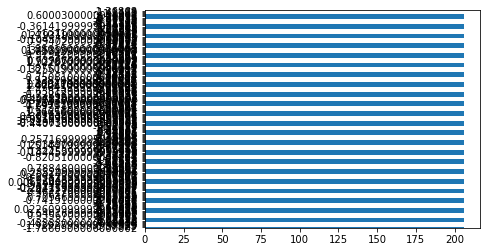

In [46]:
X_train.Power.value_counts().plot.barh();

In [48]:
from fastai.tabular import *

In [50]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [51]:
fi = rf_feat_importance(rf, X_train); fi[:10]

,cols,imp
0,Subject,0.375206
2,Trial,0.229135
7,Power,0.160432
6,Valence,0.155931
5,Eye,0.039960
4,Location,0.028804
1,Block,0.010532
3,Group,0.000000


In [52]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

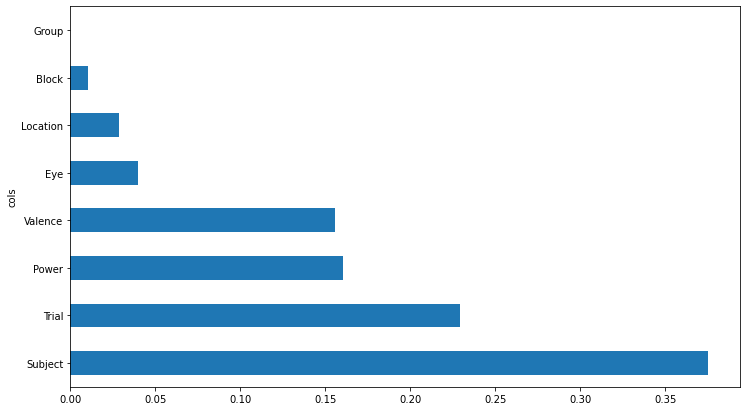

In [53]:
plot_fi(fi[:30]);

In [55]:
to_keep = fi[fi.imp>0.05].cols; len(to_keep)

4

In [60]:
X_train = X_train[to_keep]
X_valid = X_valid[to_keep]

In [61]:
rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
%time preds = np.stack([t.predict(X_valid) for t in rf.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 103 ms


(1.749812284522402, 0.5918491830711811)

In [64]:
fi = rf_feat_importance(rf, X_train); fi[:10]

,cols,imp
0,Subject,0.354669
1,Trial,0.283481
2,Power,0.183116
3,Valence,0.178734


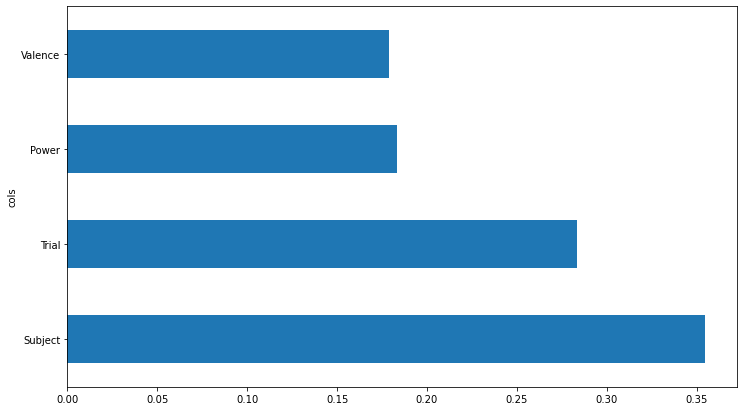

In [65]:
plot_fi(fi[:30]);